# **STROJNO UČENJE** 22./23.
# Domaća zadaća 01

U zadatku 1 i 2 kreirate sami skup podataka za treniranje modela. Nije potrebno odvajati skup podataka na podatke za treniranje i testiranje jer ne evaluirate istrenirani model.

U zadatku 3, 4 i 5 koristite dani skup podataka *bank.csv*. Kod ovog skupa podataka koji je realističniji implementirate klasični *pipeline* strojnog učenja, svojevrsni *blueprint* koji možete iskoristiti i za jednostavan projekt.

### Zadatak 1

Definirajte skup podataka na sljedeći način:
- $X$ je skup 100 slučajnih cijelih brojeva iz raspona $[0, 200]$.
- $Y$ je skup 100 slučajnih cijelih brojeva iz raspona $[-50, 50]$.

Skup podataka su točke $(x,y) \in X \times Y$ (prva koordinata iz $X$, druga iz $Y$).

> **hint:** koristite *numpy.random* kako biste generirali liste brojeva.

In [12]:
import numpy as np

X = np.random.randint(0, 201, size=100)
Y = np.random.randint(-50, 51, size=100)

Za definirani skup podataka pronađite i nacrtajte regresijski pravac.

In [13]:
from sklearn.linear_model import LinearRegression

# model

linreg = LinearRegression()
linreg.fit(X.reshape(-1, 1), Y)

Y_pred = linreg.predict(X.reshape(-1, 1))

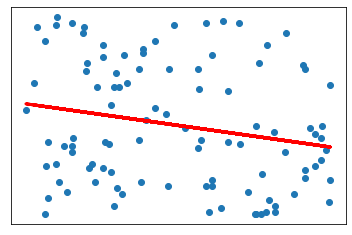

In [14]:
import matplotlib.pyplot as plt

# vizualizacija grafom

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Ispišite koeficijente regresijskog pravca te pronađite korijen srednje kvadratne greške predviđanja.

In [15]:
from sklearn.metrics import mean_squared_error

print(linreg.coef_)
print(np.sqrt(mean_squared_error(Y, Y_pred)))

[-0.11096612]
29.58651998110381


Je li greška velika s obzirom na raspon podataka?

## Zadatak 2

Za koordinate $x \in X$ iz prethodnog zadatka kreirajte nove $y \in Y$ na način da $x, y$ budu povezani funkcijom: $$f : X \longrightarrow Y$$ $$y = f(x) = 2x + 38.$$

> **hint:** iskoristite moć *numpy* biblioteke kako biste nove vrijednosti $y$ definirali jednom linijom koda

In [16]:
Y_func = 2*X + 38

Za novi definirani skup podataka pronađite i nacrtajte regresijski pravac.

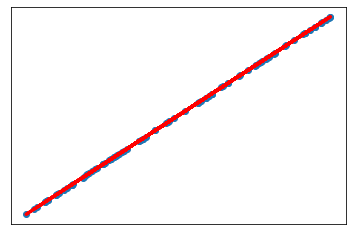

In [17]:
linreg_func = LinearRegression()
linreg_func.fit(X.reshape(-1, 1), Y_func)

Y_pred_func = linreg_func.predict(X.reshape(-1, 1))

plt.scatter(X, Y_func)
plt.plot(X, Y_pred_func, color='red', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Ispišite koeficijente regresijskog pravca te pronađite korijen srednje kvadratne greške predviđanja. Što uočavate?

In [18]:
print(linreg_func.coef_)
print(np.sqrt(mean_squared_error(Y_func, Y_pred_func)))

[2.]
3.1776437161565096e-14


Možemo li zaključiti da je korijen srednje kvadratne greške uvijek pouzdana mjera kvalitete modela?

Kako nazivamo fenomen pretjerane prilagodbe modela podacima za treniranje (u tolikoj mjeri da model gubi moć generalizacije)?

Za iste koordinate $x \in X$ kreirajte nove $y \in Y$ na način da $x, y$ budu povezani funkcijom: $$f : X \longrightarrow Y$$ $$y = f(x) = x^2 + 2x + 14.$$

In [19]:
Y_func_2 = X*X + 2*X + 14

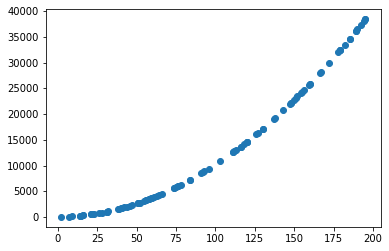

In [20]:
plt.scatter(X, Y_func_2)

Koristite Pearsonov i Spearmanov koeficijent korelacije kako biste našli matricu korelacije za ove podatke.

> **hint:** možete koristiti metodu *corr()* iz biblioteke *pandas* ukoliko povežete $X$ i $Y$ u *pandas.DataFrame* strukturu kao dva stupca.

In [21]:
import pandas as pd

pd.DataFrame({'X':X, 'Y_func_2':Y_func_2}).corr(method='pearson')

,X,Y_func_2
X,1.000000,0.973981
Y_func_2,0.973981,1.000000


In [22]:
pd.DataFrame({'X':X, 'Y_func_2':Y_func_2}).corr(method='spearman')

,X,Y_func_2
X,1.0,1.0
Y_func_2,1.0,1.0


Što primjećujete? Jesu li vrijednosti identične?

## Zadatak 3

Učitajte zadani skup podataka bank.csv.

In [23]:
bank = pd.read_csv('/content/drive/MyDrive/strojno_ucenje_2223/1_domaci/bank.csv')
bank.head()

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,673,2,-1,0,yes


In [24]:
bank.shape

(11162, 12)

Provjerite postoje li nedostajući/duplicirani podaci i uklonite ih ukoliko postoje.

In [25]:
bank.isna().sum()
bank.duplicated().sum()

0

Odredite koje varijable su kategoričke a koje numeričke.

In [26]:
bank.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
loan         object
duration      int64
campaign      int64
pdays         int64
previous      int64
deposit      object
dtype: object

Nacrtajte stupčaste dijagrame (eng. barplot) za kategoričke varijable koji prikazuju kategorije na x osi i broj uzoraka koji pripadaju toj kategoriji na y osi.

In [27]:
categorical = bank[['job', 'marital', 'education', 'housing', 'loan', 'deposit']]
numerical = bank[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]

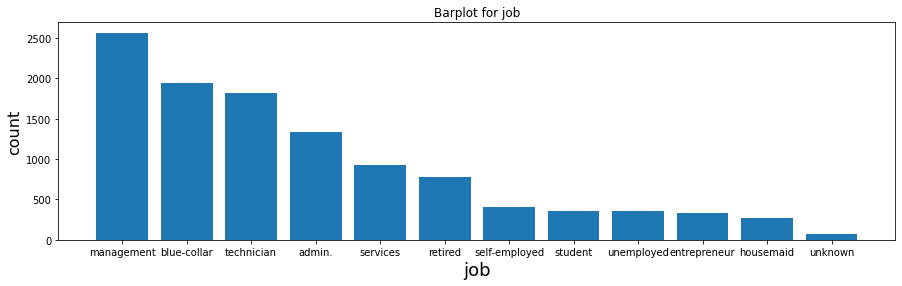

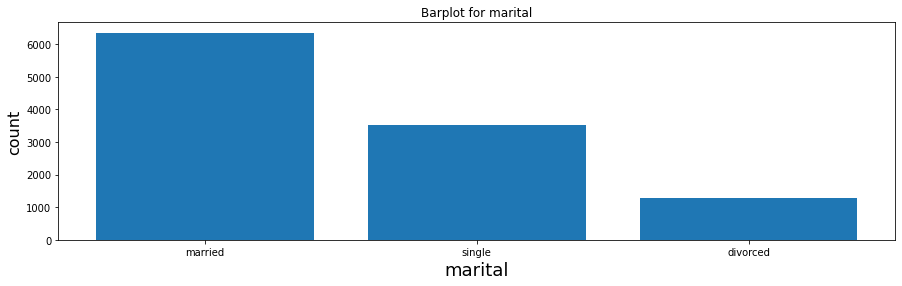

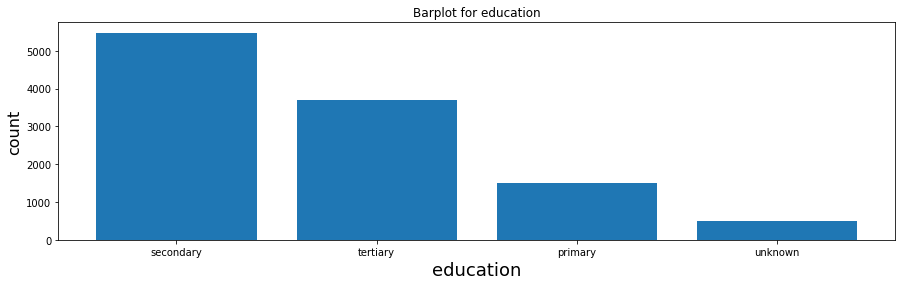

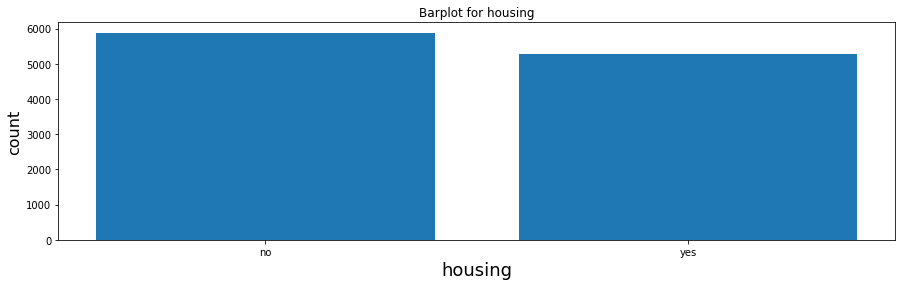

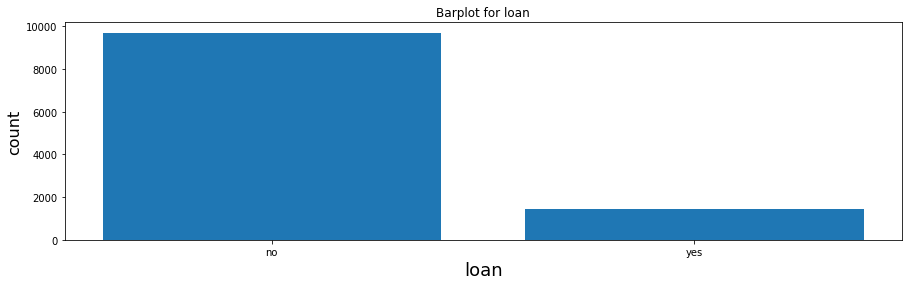

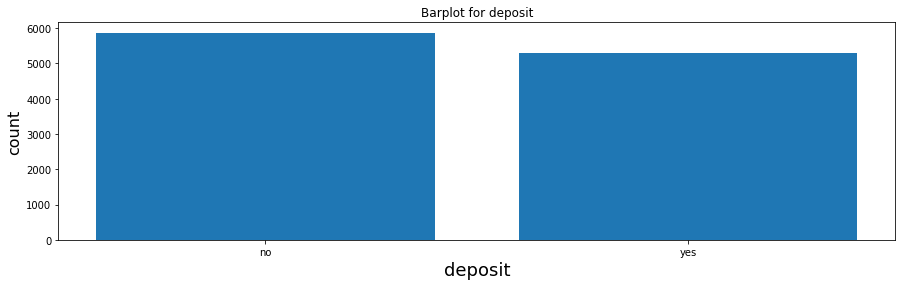

In [28]:
for col in categorical.columns:
    temp = categorical[col].value_counts().rename_axis('unique_values').reset_index(name='counts')
    plt.figure(figsize=(15,4))
    plt.bar(temp['unique_values'], temp['counts'])
    plt.title("Barplot for {0}".format(col))
    plt.xlabel(col, fontsize=18)
    plt.ylabel('count', fontsize=16)
    plt.show()

Nacrtajte empirijsku funkciju gustoće uz histogram za numeričke varijable.

> **hint:** koristite funkciju za crtanje iz biblioteke *seaborn*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

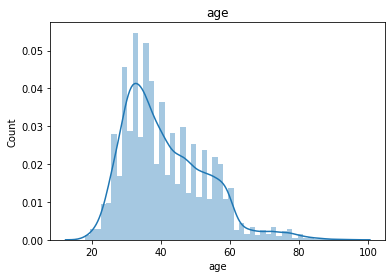

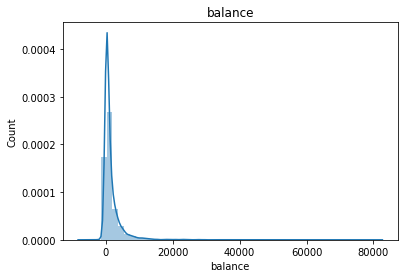

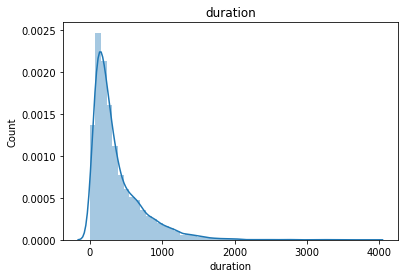

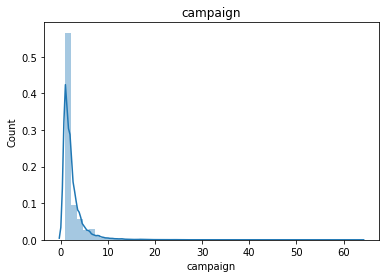

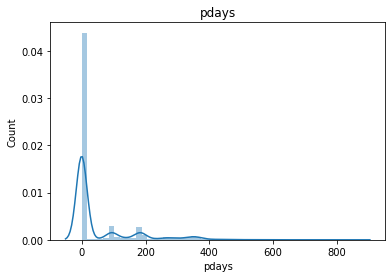

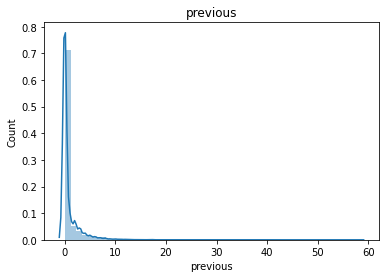

In [29]:
from seaborn import distplot

for col in numerical.columns:
  fig, ax = plt.subplots(1,1)
  distplot(bank[col])
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.title(col)
  fig.show()

Slijedi li ijedna varijabla Gaussovu (normalnu) distribuciju?

Nacrtajte kutijasti dijagram (boxplot) za numeričke varijable. Postoje li ekstremne vrijednosti?

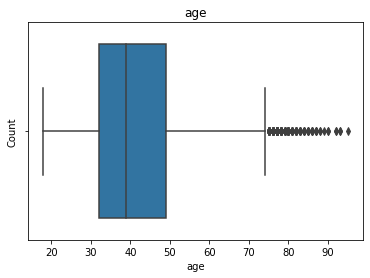

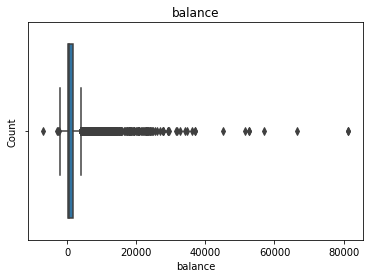

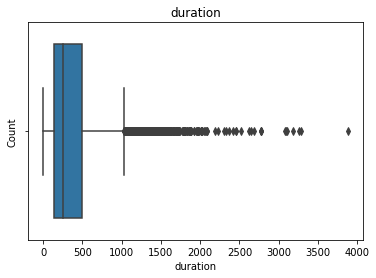

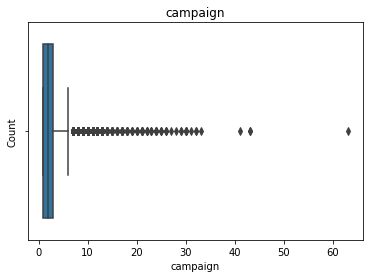

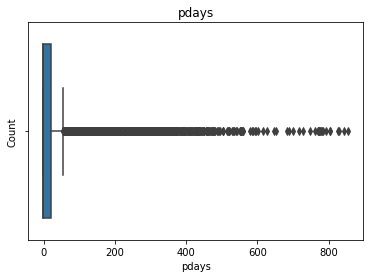

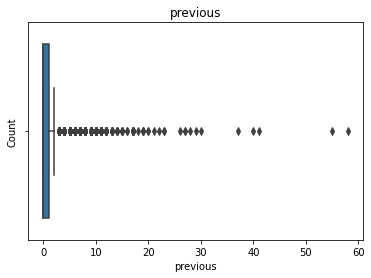

In [30]:
from seaborn import boxplot

for col in numerical.columns:
  fig, ax = plt.subplots(1,1)
  boxplot(x=numerical[col])
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.title(col)
  fig.show()

## Zadatak 4

Definirajte model slučajne šume koji će iz ostalih značajki predviđati značajku *deposit*, odnosno klasifikacijski model pomoću algoritma slučajne šume koji će predviđati hoće li klijent uzeti oročeni depozit ili neće.

Podijelite podatke na skup za treniranje i skup za testiranje u omjeru 80:20.

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bank[list(bank.columns)[:-1]], bank['deposit'], test_size=0.2)

Kodirajte kategoričke varijable metodom koja kategoriji pridružuje njenu frekvenciju.

> **hint:** možete koristiti *feature_engine* biblioteku

In [32]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 14.8 MB/s 


In [33]:
from feature_engine.encoding import CountFrequencyEncoder

categorical_variables = list(categorical.columns)[:-1]

encoder = CountFrequencyEncoder(encoding_method='frequency')
encoder.fit(X_train[categorical_variables])
X_train[categorical_variables] = encoder.transform(X_train[categorical_variables])
X_test[categorical_variables] = encoder.transform(X_test[categorical_variables])

Zavisnu varijablu kodirajte na način da 'yes' bude predstavljeno jedinicom, a 'no' nulom.

In [34]:
y_train.replace('yes', 1, inplace=True)
y_train.replace('no', 0, inplace=True)

y_test.replace('yes', 1, inplace=True)
y_test.replace('no', 0, inplace=True)

Istrenirajte model slučajne šume nad podacima za treniranje sa zadanim (default) hiperparametrima. Postavite vrijednost argumenta *random_state* na 42.

In [35]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluirajte istrenirani klasifikator nad podacima za testiranje pomoću ugrađene metode *score()*.

In [36]:
print('score: ', clf.score(X_test, y_test))

score:  0.80653828929691


## Zadatak 5

Pronađite najbolji hiperparametar *n_estimators* u skupu vrijednosti $[50, 150, 300, 500]$ za zadani skup podataka. Koristite *GridSearchCV* sa unakrsnom validacijom na 8 preklopa (eng. folds).

> **napomena:** pri definiciji klasifikatora postavite vrijednost argumenta *random_state* na 42 (čemu služi *random_state*?)

In [37]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[50, 150, 300, 500]}

rf = RandomForestClassifier(random_state=42)
clf_grid = GridSearchCV(rf, parameters, verbose=2, cv=8)

clf_grid.fit(X_train, y_train)

Fitting 8 folds for each of 4 candidates, totalling 32 fits
[CV] END ....................................n_estimators=50; total time=   0.6s
[CV] END ....................................n_estimators=50; total time=   0.7s
[CV] END ....................................n_estimators=50; total time=   0.5s
[CV] END ....................................n_estimators=50; total time=   0.6s
[CV] END ....................................n_estimators=50; total time=   0.5s
[CV] END ....................................n_estimators=50; total time=   0.7s
[CV] END ....................................n_estimators=50; total time=   0.5s
[CV] END ....................................n_estimators=50; total time=   0.6s
[CV] END ...................................n_estimators=150; total time=   2.2s
[CV] END ...................................n_estimators=150; total time=   2.9s
[CV] END ...................................n_estimators=150; total time=   3.4s
[CV] END ...................................n_est

GridSearchCV(cv=8, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [50, 150, 300, 500]}, verbose=2)

Dohvatite najbolji model pronađen gornjom metodom, odnosno model s najboljom vrijednošću hiperparametra *n_estimators*. Koja je vrijednost tog hiperparametra?

In [38]:
best_model = clf_grid.best_estimator_
best_model

RandomForestClassifier(n_estimators=150, random_state=42)

Evaluirajte najbolji model na podacima za testiranje pomoću metode *score()*.

In [39]:
best_model.score(X_test, y_test)

0.8069861173309449

Je li promjena velika u odnosu na model sa zadanim (default) hiperparametrima? Kako biste još mogli poboljšati model?